# MPVBench_Tutorial

<img src="data/img/00MPVBench_logo.svg" alt="MPVBenchLogo" width="600"/>

This notebook offers tools and workflows to analyze power and temperature data from the **MPVBench** repository over time. The data, records from various Mini Photovoltaic (MPV) systems located in districts Karlsruhe and Pforzheim, provide real-measured MPV data insights.  For a detailed overview of the data, structure, and MPV systems, refer to the MPVBench repository's [README.md](README.md).

**⚠️ Note**: **Last update was on 02.01.2025**.

The dataset contains one year of MPV data recorded at 5- and 15-minute intervals.

#### **Step 1: Check if files exist**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Check versions
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

# Define the paths to the CSV files
power_path_5min = "data/p_watt_5min.csv"
power_path_15min = "data/p_watt_15min.csv"
temp_path_5min = "data/t_celsius_5min.csv"
temp_path_15min = "data/t_celsius_15min.csv"

# Check if the files exist
if not os.path.exists(power_path_5min):
    raise FileNotFoundError(f"File not found: {power_path_5min}")
if not os.path.exists(power_path_15min):
    raise FileNotFoundError(f"File not found: {power_path_15min}")
if not os.path.exists(temp_path_5min):
    raise FileNotFoundError(f"File not found: {temp_path_5min}")
if not os.path.exists(temp_path_15min):
    raise FileNotFoundError(f"File not found: {temp_path_15min}")

pandas version: 2.2.2
matplotlib version: 3.8.4


#### **Step 2: Load the CSV files**

In [2]:
# Load the power and temperature data into DataFrames
df_power_5min = pd.read_csv(power_path_5min)
df_power_15min = pd.read_csv(power_path_15min)
df_temp_5min = pd.read_csv(temp_path_5min)
df_temp_15min = pd.read_csv(temp_path_15min)

#### **Step 3: Ensure 'time' is parsed as datetime**

In [3]:
# Convert the 'time' column to datetime objects
df_power_5min["time"] = pd.to_datetime(df_power_5min["time"])
df_power_15min["time"] = pd.to_datetime(df_power_15min["time"])
df_temp_5min["time"] = pd.to_datetime(df_temp_5min["time"])
df_temp_15min["time"] = pd.to_datetime(df_temp_15min["time"])

#### **Step 4: Print the first few rows and data types of each DataFrame**

In [4]:
print("Power DataFrames:")
print("5-minute resolution:")
print(df_power_5min.head())
print("15-minute resolution:")
print(df_power_15min.head())

print("Temperature DataFrames:")
print("5-minute resolution:")
print(df_temp_5min.head())
print("15-minute resolution:")
print(df_temp_15min.head())

Power DataFrames:
5-minute resolution:
                 time   1a   1b   2a   2b   1c
0 2024-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0
1 2024-01-01 00:05:00  0.0  0.0  0.0  0.0  0.0
2 2024-01-01 00:10:00  0.0  0.0  0.0  0.0  0.0
3 2024-01-01 00:15:00  0.0  0.0  0.0  0.0  0.0
4 2024-01-01 00:20:00  0.0  0.0  0.0  0.0  0.0
15-minute resolution:
                 time   1a   1b    2a   2b   1c
0 2024-01-01 00:00:00  0.0  0.0  0.00  0.0  0.0
1 2024-01-01 00:15:00  0.0  0.0  0.00  0.0  0.0
2 2024-01-01 00:30:00  0.0  0.0  0.04  0.0  0.0
3 2024-01-01 00:45:00  0.0  0.0  0.00  0.0  0.0
4 2024-01-01 01:00:00  0.0  0.0  0.05  0.0  0.0
Temperature DataFrames:
5-minute resolution:
                 time     1a     1b    2a    2b    1c
0 2024-01-01 00:00:00  22.77  12.64  9.00  6.71  6.11
1 2024-01-01 00:05:00  22.78  12.63  8.82  6.47  6.18
2 2024-01-01 00:10:00  22.74  12.52  8.92  6.56  6.27
3 2024-01-01 00:15:00  22.70  12.49  9.00  6.79  6.17
4 2024-01-01 00:20:00  22.73  12.62  8.95  6.64  5.83


#### **Step 5: Calculate mean values for the specified date range**

In [5]:
# Define the date range
start_date = "2024-08-30"
end_date = "2024-08-31"
start_date_dt = pd.to_datetime(start_date, format="%Y-%m-%d")
end_date_dt = pd.to_datetime(end_date, format="%Y-%m-%d")
date_difference = (end_date_dt - start_date_dt).days

# Filter the DataFrames for the specified date range
mask_power_5min = (df_power_5min["time"] >= start_date) & (
    df_power_5min["time"] <= end_date
)
mask_power_15min = (df_power_15min["time"] >= start_date) & (
    df_power_15min["time"] <= end_date
)
mask_temp_5min = (df_temp_5min["time"] >= start_date) & (
    df_temp_5min["time"] <= end_date
)
mask_temp_15min = (df_temp_15min["time"] >= start_date) & (
    df_temp_15min["time"] <= end_date
)

#### **Step 6: Plot the data**

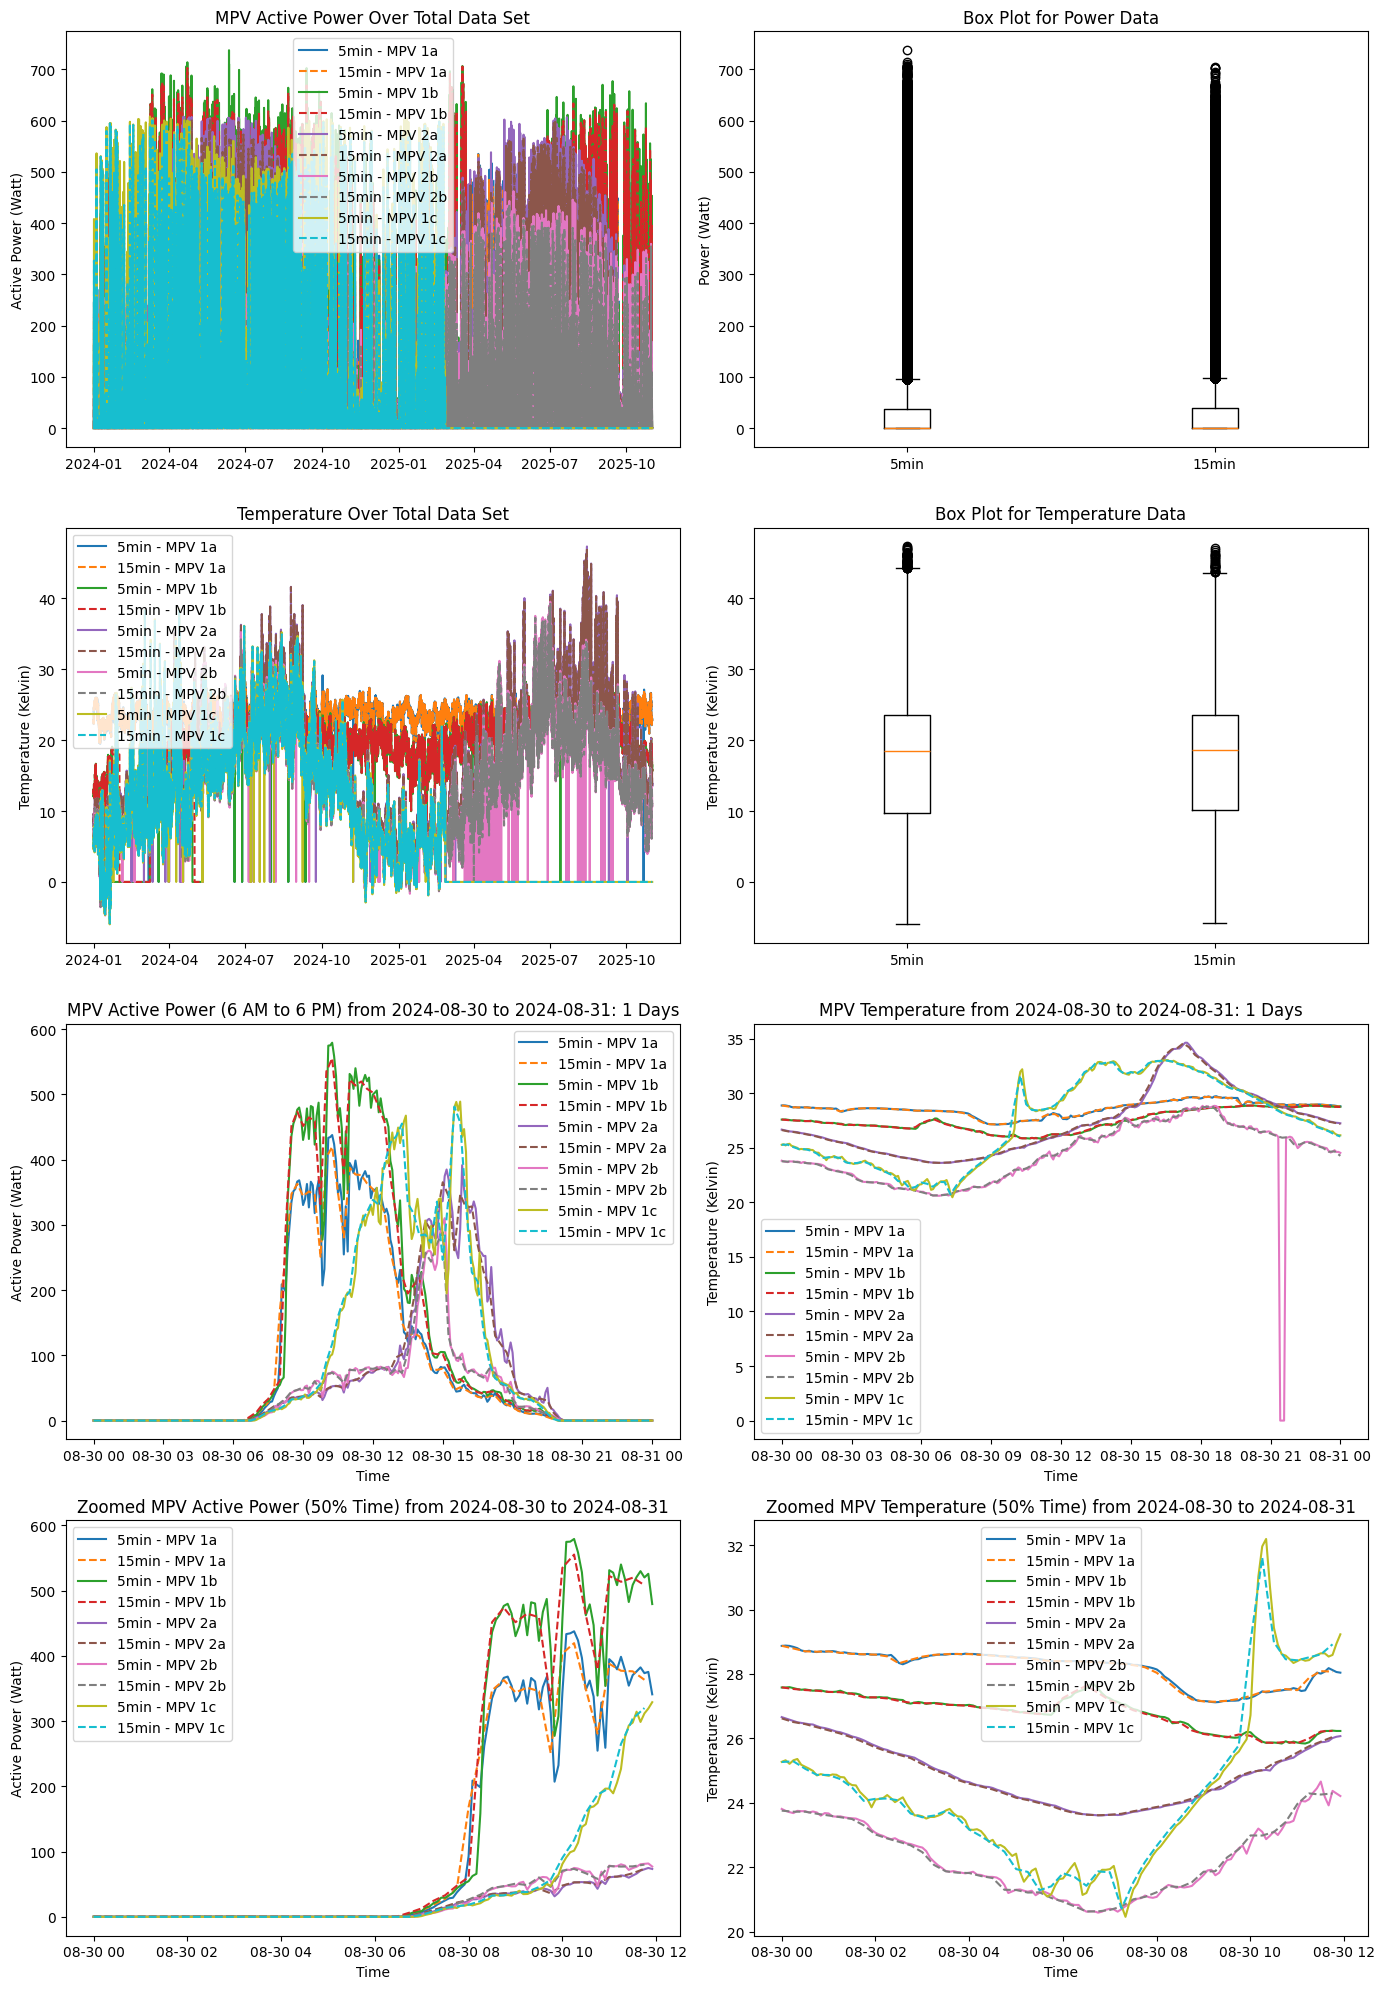

In [6]:
# Create a new figure with subplots
fig, axs = plt.subplots(4, 2, figsize=(14, 20))

# Plot Active Power (5min and 15min)
for col in df_power_5min.columns[1:]:
    axs[0, 0].plot(df_power_5min["time"], df_power_5min[col], label=f"5min - MPV {col}")
    axs[0, 0].plot(
        df_power_15min["time"],
        df_power_15min[col],
        label=f"15min - MPV {col}",
        linestyle="--",
    )
axs[0, 0].set_ylabel("Active Power (Watt)")
axs[0, 0].set_title("MPV Active Power Over Total Data Set")
axs[0, 0].legend()

# Plot Temperature (5min and 15min)
for col in df_temp_5min.columns[1:]:
    axs[1, 0].plot(df_temp_5min["time"], df_temp_5min[col], label=f"5min - MPV {col}")
    axs[1, 0].plot(
        df_temp_15min["time"],
        df_temp_15min[col],
        label=f"15min - MPV {col}",
        linestyle="--",
    )
axs[1, 0].set_ylabel("Temperature (Kelvin)")
axs[1, 0].set_title("Temperature Over Total Data Set")
axs[1, 0].legend()

# Plot Active Power for Specified Date Range (5min and 15min)
for col in df_power_5min.columns[1:]:
    axs[2, 0].plot(
        df_power_5min.loc[mask_power_5min & mask_temp_5min, "time"],
        df_power_5min.loc[mask_power_5min & mask_temp_5min, col],
        label=f"5min - MPV {col}",
    )
    axs[2, 0].plot(
        df_power_15min.loc[mask_power_15min & mask_temp_15min, "time"],
        df_power_15min.loc[mask_power_15min & mask_temp_15min, col],
        label=f"15min - MPV {col}",
        linestyle="--",
    )
axs[2, 0].set_xlabel("Time")
axs[2, 0].set_ylabel("Active Power (Watt)")
axs[2, 0].set_title(
    f"MPV Active Power (6 AM to 6 PM) from {start_date} to {end_date}: {date_difference} Days"
)
axs[2, 0].legend()

# Zoomed-In Plot for Active Power (50% of the data)
for col in df_power_5min.columns[1:]:
    half_data_5min = df_power_5min.loc[mask_power_5min & mask_temp_5min].iloc[
        : len(df_power_5min.loc[mask_power_5min & mask_temp_5min]) // 2
    ]
    half_data_15min = df_power_15min.loc[mask_power_15min & mask_temp_15min].iloc[
        : len(df_power_15min.loc[mask_power_15min & mask_temp_15min]) // 2
    ]
    axs[3, 0].plot(
        half_data_5min["time"], half_data_5min[col], label=f"5min - MPV {col}"
    )
    axs[3, 0].plot(
        half_data_15min["time"],
        half_data_15min[col],
        label=f"15min - MPV {col}",
        linestyle="--",
    )
axs[3, 0].set_xlabel("Time")
axs[3, 0].set_ylabel("Active Power (Watt)")
axs[3, 0].set_title(
    f"Zoomed MPV Active Power (50% Time) from {start_date} to {end_date}"
)
axs[3, 0].legend()

# Box Plot for Power Data (5min and 15min)
axs[0, 1].boxplot(
    [
        df_power_5min.iloc[:, 1:].values.flatten(),
        df_power_15min.iloc[:, 1:].values.flatten(),
    ],
    labels=["5min", "15min"],
)
axs[0, 1].set_title("Box Plot for Power Data")
axs[0, 1].set_ylabel("Power (Watt)")

# Box Plot for Temperature Data (5min and 15min)
axs[1, 1].boxplot(
    [
        df_temp_5min.iloc[:, 1:].values.flatten(),
        df_temp_15min.iloc[:, 1:].values.flatten(),
    ],
    labels=["5min", "15min"],
)
axs[1, 1].set_title("Box Plot for Temperature Data")
axs[1, 1].set_ylabel("Temperature (Kelvin)")

# Plot Temperature for Specified Date Range (5min and 15min)
for col in df_temp_5min.columns[1:]:
    axs[2, 1].plot(
        df_temp_5min.loc[mask_temp_5min, "time"],
        df_temp_5min.loc[mask_temp_5min, col],
        label=f"5min - MPV {col}",
    )
    axs[2, 1].plot(
        df_temp_15min.loc[mask_temp_15min, "time"],
        df_temp_15min.loc[mask_temp_15min, col],
        label=f"15min - MPV {col}",
        linestyle="--",
    )
axs[2, 1].set_xlabel("Time")
axs[2, 1].set_ylabel("Temperature (Kelvin)")
axs[2, 1].set_title(
    f"MPV Temperature from {start_date} to {end_date}: {date_difference} Days"
)
axs[2, 1].legend()

# Zoomed-In Plot for Temperature (50% of the data)
for col in df_power_5min.columns[1:]:
    half_data_5min = df_temp_5min.loc[mask_power_5min & mask_temp_5min].iloc[
        : len(df_power_5min.loc[mask_power_5min & mask_temp_5min]) // 2
    ]
    half_data_15min = df_temp_15min.loc[mask_power_15min & mask_temp_15min].iloc[
        : len(df_power_15min.loc[mask_power_15min & mask_temp_15min]) // 2
    ]
    axs[3, 1].plot(
        half_data_5min["time"], half_data_5min[col], label=f"5min - MPV {col}"
    )
    axs[3, 1].plot(
        half_data_15min["time"],
        half_data_15min[col],
        label=f"15min - MPV {col}",
        linestyle="--",
    )
axs[3, 1].set_xlabel("Time")
axs[3, 1].set_ylabel("Temperature (Kelvin)")
axs[3, 1].set_title(
    f"Zoomed MPV Temperature (50% Time) from {start_date} to {end_date}"
)
axs[3, 1].legend()

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

#### **Step 7: Conclusion** 

Congratulations! You have learned to load, analyze, and visualize power and temperature data. This knowledge can be applied in various domains, especially energy analysis and climate studies. Feel free to enhance the visualizations or integrate more data sources for a deeper analysis.